# Initializations
Before running first cell, make sure a nameserver is running on the network, the Qick board is connected to it, and the ip address listed below matches that of the nameserver. 

You just need to run the first cell, then should be able to run any other cell in whatever order. 

If you are starting for first time, go to second cell and set up a new config and path. 

In [ ]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from qick import QickConfig
import sys 
sys.path.append('../')
from slab_qick_calib.exp_handling.instrumentmanager import InstrumentManager
import slab_qick_calib.experiments as meas
import slab_qick_calib.config as config
from slab_qick_calib.calib import qubit_tuning, tuneup
from slab_qick_calib import handy
from tqdm.notebook import tqdm
# import importlib 
# importlib.reload(meas)

%load_ext autoreload
%autoreload 2

# Configuration
ip = '10.108.30.23'
cfg_file='identical_transmon.yml'
expt_path = 'C:\\_Data\\Litten\\2025-04-28\\'

# expt_path = 'C:\\_Data\\Litten_tunable\\2025-04-29\\'
# cfg_file='Litten_tunable1.yml'

max_t1 = 75

# Set seaborn color palette
colors = ["#0869c8", "#b51d14", '#ddb310', '#658b38', '#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

# Figure parameters
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams.update({'font.size': 13})

print('Data will be stored in', expt_path)

# Results config file
cfg_path = os.path.join(os.getcwd(), 'configs', cfg_file)
auto_cfg = config.load(cfg_path)

# Connect to instruments
im = InstrumentManager(ns_address=ip)
print(im)
soc = QickConfig(im[auto_cfg['aliases']['soc']].get_cfg())
print(soc)

num_qubits = len(auto_cfg.device.qubit.f_ge)
cfg_dict = {'soc': soc, 'expt_path': expt_path, 'cfg_file': cfg_path, 'im': im}


imported experiments.single_qubit.active_reset
imported experiments.single_qubit.inactive
imported experiments.single_qubit.pulse_probe_spectroscopy
imported experiments.single_qubit.rabi
imported experiments.single_qubit.resonator_spectroscopy
imported experiments.single_qubit.single_shot
imported experiments.single_qubit.stark_spectroscopy
imported experiments.single_qubit.t1
imported experiments.single_qubit.t1_cont
imported experiments.single_qubit.t1_stark
imported experiments.single_qubit.t2
imported experiments.single_qubit.t2_ramsey_stark
imported experiments.single_qubit.tof_calibration
imported experiments.two_qubit.rabi_2q
imported experiments.two_qubit.t1_2q
imported experiments.two_qubit.t1_2q_cont
imported experiments.two_qubit.t1_2q_conttest
imported experiments.single_qubit.active_reset
imported experiments.single_qubit.inactive
imported experiments.single_qubit.pulse_probe_spectroscopy
imported experiments.single_qubit.rabi
imported experiments.single_qubit.resonator_s

In [2]:
os.getcwd()

'c:\\_Lib\\python\\qq\\slab_qick_calib'

## Set up new config or data folder

After running, move expt_path and cfg_file to the first cell. 

Note: make sure you set your ADC/DAC channels correctly. This code does not automatically fill in the ADC/DAC into your configuration file, so you should check yourself to make sure these values are correct. 

There are several elements that you may want to customize 

In [4]:
expt_path = 'C:\\_Data\\Litten_tunable\\2025-04-29\\'
cfg_file='identical_transmon.yml'

import os
import slab_qick_calib.config as config
new_config = True
new_folder = True

configs_dir = os.path.join(os.getcwd(), 'configs')
cfg_file_path = os.path.join(configs_dir, cfg_file)
images_dir = os.path.join(expt_path, 'images')
summary_dir = os.path.join(images_dir, 'summary')



if new_config or new_folder:

    if new_config:
        config.init_config(cfg_file_path, 3, type='full', aliases='bf1_soc', t1=30)

    if not os.path.exists(expt_path):
        os.makedirs(expt_path)
        os.mkdir(images_dir)
        os.mkdir(summary_dir)

## Signalcore init

In [ ]:
sc1 = im['SC1']
sc2 = im['SC2']

sc1.open_device()
sc2.open_device()

def set_frequency(sc, freq):
    sc.set_standby(enable = True)
    sc1.set_frequency(freq*1e6)
    sc2.set_standby(enable = False)
    time.sleep(5)

def set_power(sc, power):
    sc.set_standby(enable = True)

    sc.set_power(power)
    sc.set_standby(enable = False)

    time.sleep(5)

In [ ]:
sc1.set_power(13)
sc2.set_power(13)

In [ ]:
sc1.close_device()

## Check QICK issues

### Check mirror frequencies 

In [ ]:
import qick_check

qick_check.check_freqs(0, cfg_dict)

In [ ]:
qick_check.check_resonances(cfg_dict)

In [ ]:
cfg_dict['soc']._get_ch_cfg(ro_ch=0)['f_dds']/2
cfg_dict['soc'].cycles2us(1)

### Make sure you're not near the nyquist frequency of the ADC

In [ ]:
import qick_check
qick_check.check_adc(cfg_dict)

# Time of Flight (TOF)

TOF measures the time it takes for the signal to run through the wires. It will give us the time in clock ticks that we should wait to make a measurements 

  0%|          | 0/1000 [00:00<?, ?it/s]

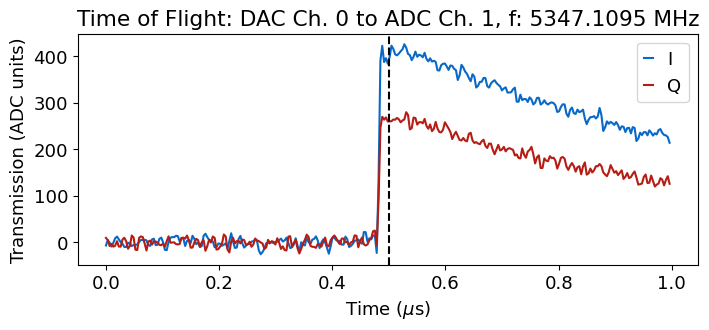

In [10]:
qubit_list = np.arange(3)
qubit_list = [0]
for qi in qubit_list:  
        tof=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi)
        #tof=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi,params={'readout_length':13})#,params={'frequency':fi})
        # use this to set trig_offset in config file

In [ ]:
qubit_list = np.arange(3)
qubit_list = [10]
#f = [1050]
#f = [2800,2900,3000,3100]
f= [1900,1905,1910]
#f = [1000,1500,2000,2200,2400.0, 2442, 2450, 2452, 2454, 2455, 2455.3, 2455.6, 2456, 2457, 2459, 2461,3000]
for fi in f: 
        for qi in qubit_list:  
                tof_g=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi, params={'frequency':fi})
                #tof=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi,params={'readout_length':13})#,params={'frequency':fi})
# use this to set trig_offset in config file

In [ ]:
qubit_list = np.arange(3)
qubit_list = [1]
for qi in qubit_list:  
        tof_e=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi,params={'readout_length':13,'check_e':True,'soft_avgs':4000,'use_readout':True})
        tof_g=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi,params={'readout_length':13,'check_e':False,'soft_avgs':4000,'use_readout':True})
                #tof=meas.ToFCalibrationExperiment(cfg_dict=cfg_dict, qi=qi,params={'readout_length':13})#,params={'frequency':fi})
# use this to set trig_offset in config file

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
ax[0].plot(tof_g.data['xpts'],tof_g.data['i'])
ax[0].plot(tof_e.data['xpts'],tof_e.data['i'])

ax[1].plot(tof_g.data['xpts'],tof_g.data['q'])
ax[1].plot(tof_e.data['xpts'],tof_e.data['q'])
ax[2].plot(tof_e.data['xpts'],tof_e.data['i']-tof_g.data['i'])

plt.axvline(x=0.506, color='black')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # alpha makes it semi-transparent


# Resonator Spectroscopy 

Run resonator spectroscopy for all resonators by choosing a large frequency scan to look over. The scan will then find the different resonators and fill in the config file with their respective frequencies. In the autocalibration, there will be a finer sweep of each resonator to more accurately find its frequency. The frequencies are saved in <code>auto_cfg.device.readout.frequency</code>

## Coarse 

This will perform peak finding

  0%|          | 0/3600000 [00:00<?, ?it/s]

Number of peaks: 0


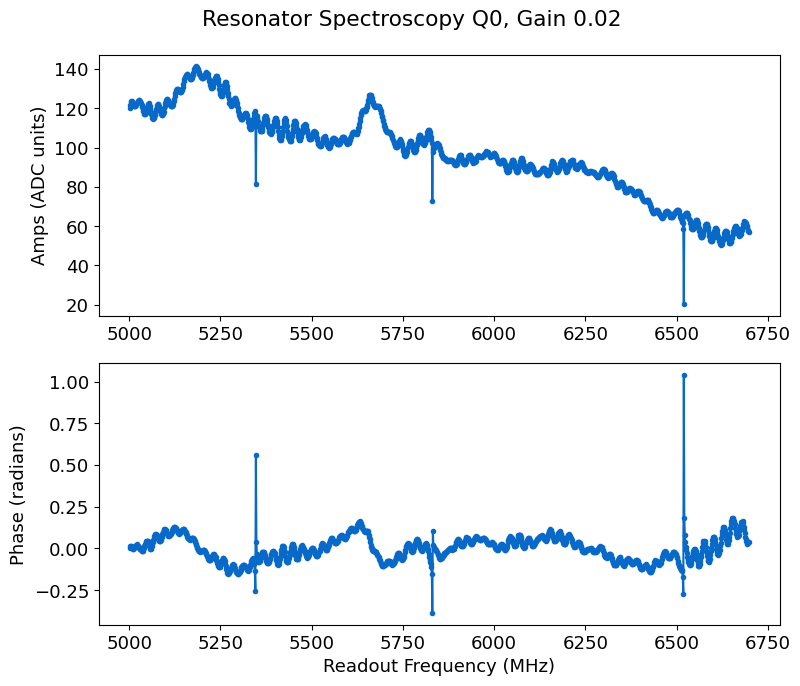

In [10]:
#rspec = cfg.make_rspec_coarse(soc, expt_path, cfg_path, i, im=im, start=6000, span=800, reps=2000, npts=5000)
qi=0
rspecc = meas.ResSpec(cfg_dict, qi=qi, style='coarse', params={'start':5000, 'span':1700, 'soft_avgs':1, 'reps':3000, 'gain':0.02, 'expts':1200})
res_values = rspecc.data['coarse_peaks']

Change prom (prominence value) to adjust how to find the peaks

Number of peaks: 3


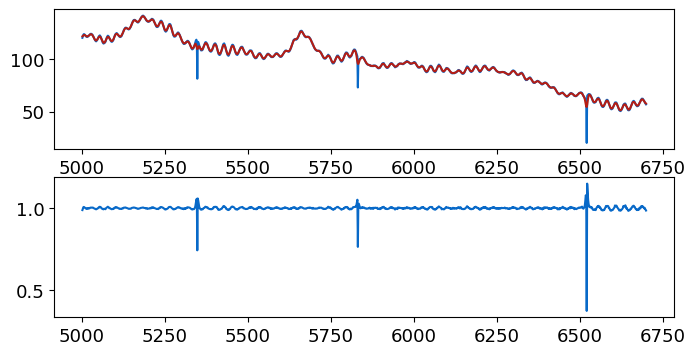

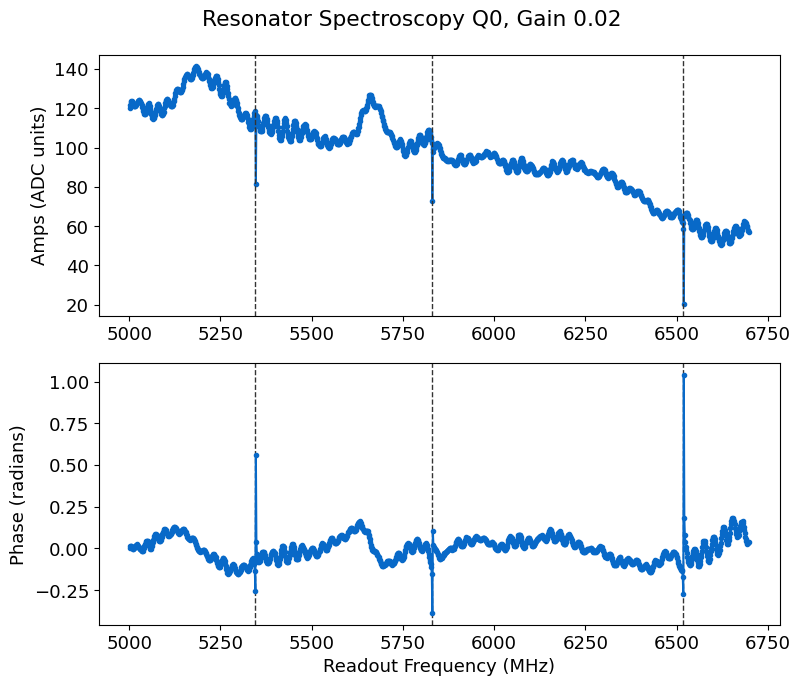

In [11]:
rspecc.analyze(peaks=True, debug=True, fit=False, prom=0.065)
rspecc.display(peaks=True, fit=False)
res_values = rspecc.data['coarse_peaks']

In [12]:
res_values

array([5347.37220612, 5830.85759869, 6519.93062153])

In [ ]:
cfg_dict

Can delete values from res_values if they don't seem to be real res_values. 

In [ ]:
res_values = np.delete(res_values, 2)

## Fine

In [11]:
# Just run one  
update=True

num_peaks = len(res_values)
# qubit_list=[1]
for qi in range(num_peaks):    
    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':5, 'center':res_values[qi]})
    #rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':5, 'gain':0.03,'loop':False})
    # rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa'})
    if update: rspec.update(cfg_dict['cfg_file'])

#plot will appear weird first because it plots the resonator frequency in the config on the same plot

NameError: name 'res_values' is not defined

  0%|          | 0/220000 [00:00<?, ?it/s]

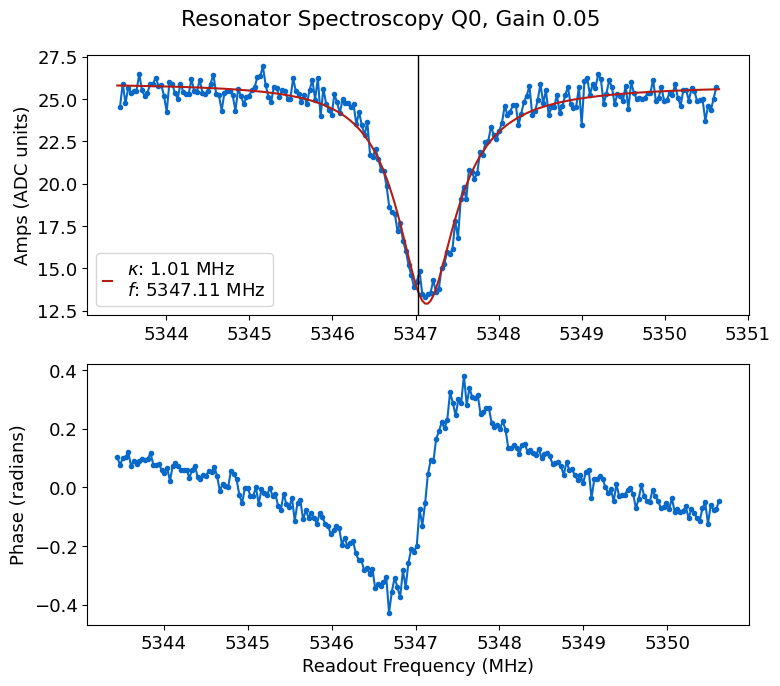

  0%|          | 0/220000 [00:00<?, ?it/s]

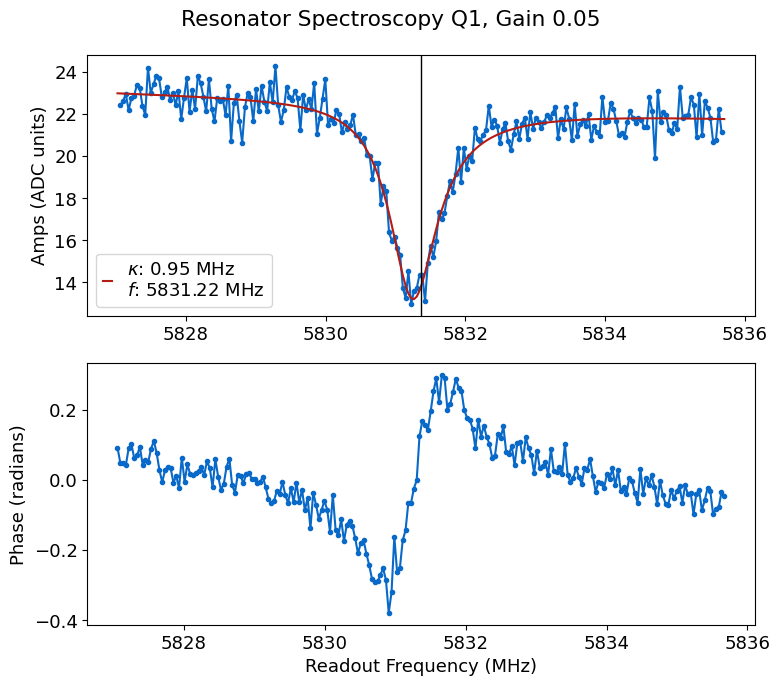

*Set cfg device.readout 1 frequency to 5831.2268 from 5831.3673*
*Set cfg device.readout 1 kappa to 0.9475 from 1.2418*
*Set cfg device.readout 1 qi to 1.0493 from 0.8557*
*Set cfg device.readout 1 qe to 1.4883 from 1.0407*


  0%|          | 0/220000 [00:00<?, ?it/s]

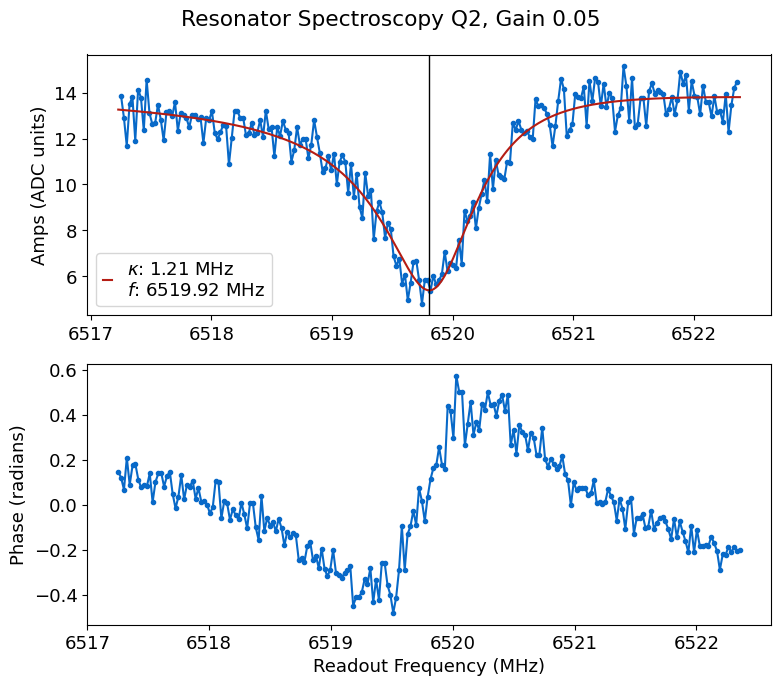

*Set cfg device.readout 2 frequency to 6519.746 from 6519.8049*
*Set cfg device.readout 2 kappa to 1.2075 from 0.7359*
*Set cfg device.readout 2 qi to 1.4406 from 9.0506*
*Set cfg device.readout 2 qe to 0.8637 from 0.9821*


In [13]:
# Just run one  
update=True

qubit_list = np.arange(3)
# qubit_list=[1]
for qi in qubit_list:    
    #rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':5, 'center':res_values[qi]})
    #rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':5, 'gain':0.03,'loop':False})
    rspec = meas.ResSpec(cfg_dict, qi=qi, params={'span':'kappa','reps':1000})
    if update: rspec.update(cfg_dict['cfg_file'])

In [ ]:
config.update_lo(cfg_path, 'gain', 0.18, qi);

## Resonator Power Spectroscopy 

Find a good value for gain to park your readout at until you run readout optimization. From the 2D sweep that is produced, choose a value for gain that is right before the resonator 'breaks' (goes from e -> f). Want to choose a high value for gain because we want to be in the shot noise limited regime which increases our signal:noise ratio. The gain value should be saved in <code>auto_cfg.device.readout.gain</code>

0
[0, 1, 1, 1, 2, 3, 4, 7, 10, 14, 21, 32, 47, 69, 103, 152, 226, 334, 495, 734, 1088, 1612, 2389, 3540, 5246, 7775, 11522, 17075, 25304, 37500]


  0%|          | 0/30 [00:00<?, ?it/s]

High power peak [MHz]: 5347.1400661828675
Low power peak [MHz]: 5347.1462848096835
Lamb shift [MHz]: -0.0062186268160076


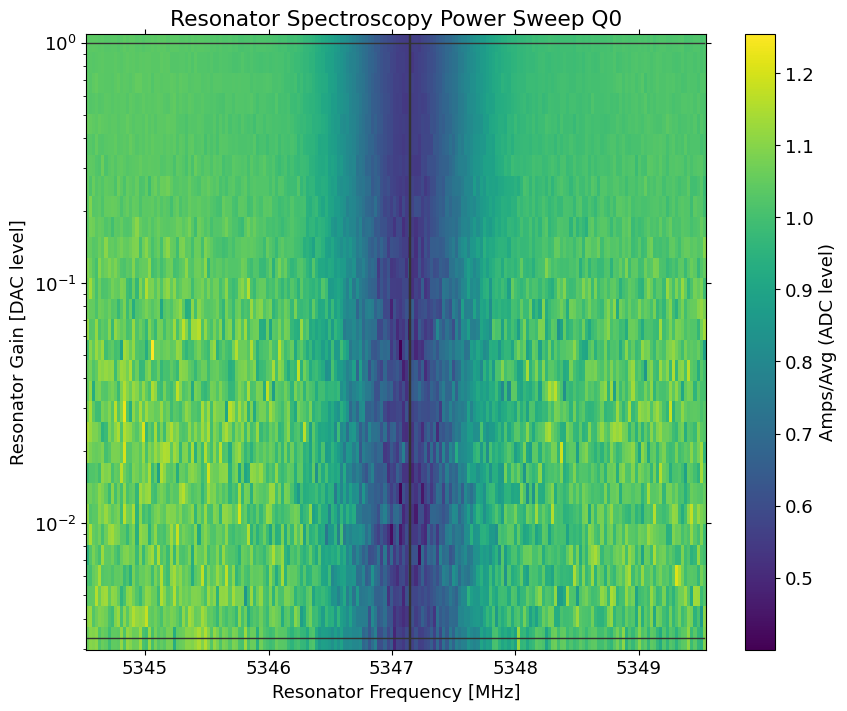

*Set cfg device.readout 0 lamb to -0.0062 from 0.0494*
1
[0, 1, 1, 1, 2, 3, 4, 7, 10, 14, 21, 32, 47, 69, 103, 152, 226, 334, 495, 734, 1088, 1612, 2389, 3540, 5246, 7775, 11522, 17075, 25304, 37500]


  0%|          | 0/30 [00:00<?, ?it/s]

High power peak [MHz]: 5830.878779223166
Low power peak [MHz]: 5831.305670899741
Lamb shift [MHz]: -0.4268916765749964


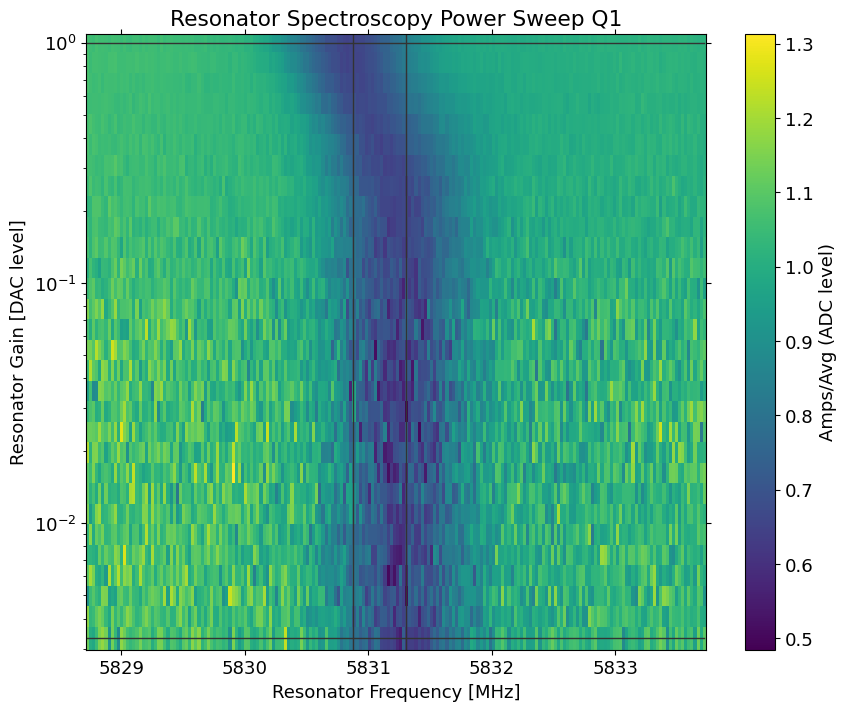

*Set cfg device.readout 1 lamb to -0.4269 from -0.4094*
2
[0, 1, 1, 1, 2, 3, 4, 7, 10, 14, 21, 32, 47, 69, 103, 152, 226, 334, 495, 734, 1088, 1612, 2389, 3540, 5246, 7775, 11522, 17075, 25304, 37500]


  0%|          | 0/30 [00:00<?, ?it/s]

High power peak [MHz]: 6519.747140673141
Low power peak [MHz]: 6519.791347105685
Lamb shift [MHz]: -0.04420643254434253


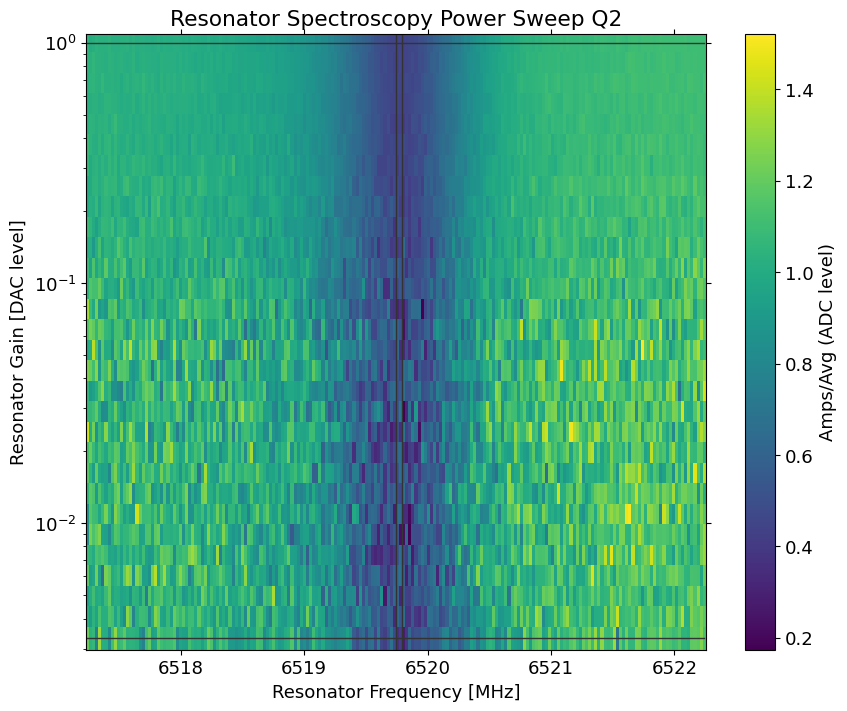

*Set cfg device.readout 2 lamb to -0.0442 from -0.025*


In [16]:
update=True
qubit_list = np.arange(13,20)
d=[]
qubit_list=[0,1,2]
for qi in qubit_list:
    #rpowspec=meas.ResSpecPower(cfg_dict, qi=qi)
    print(qi)
    rpowspec=meas.ResSpecPower(cfg_dict, qi=qi, params={'rng':300,'max_gain':1, 'span':5,"f_off":1,'expts_gain':30})
    d.append(rpowspec)
    if update:
        auto_cfg = config.update_readout(cfg_path, 'lamb', rpowspec.data['lamb_shift'], qi)


In [14]:
rpowspec.print()

gain: 0.05
reps: 0.0625
soft_avgs: 1
length: 5
final_delay: 5
pulse_e: False
pulse_f: False
qubit: [2]
qubit_chan: 1
long_pulse: False
loop: False
phase_const: False
active_reset: False
kappa: 0.7359
center: 6519.8049
expts: 200
span: 5
rng: 300
max_gain: 1
start_gain: 0.003
step_gain: 0.05
expts_gain: 30
f_off: 1
min_reps: 100
log: True
start: 6516.3049
frequency: <qick.asm_v2.QickParam object at 0x000002159F239B50>


In [ ]:
qi=18
auto_cfg = config.load(cfg_dict['cfg_file'])
freq=auto_cfg['device']['readout']['frequency'][qi]+auto_cfg['hw']['soc']['lo']['mixer_freq'][qi]


In [ ]:
lo_list = [5000]
for lo in lo_list:
    config.update_readout(cfg_path, 'frequency', freq-lo, qi)
    config.update_lo(cfg_path, 'mixer_freq', lo, qi)
    rpowspec=meas.ResSpecPower(cfg_dict, qi=qi, params={'rng':100, 'span':4,"f_off":0,'expts_gain':30})

In [ ]:
auto_cfg = config.load(cfg_path)
horz_line = auto_cfg.device.readout.gain
handy.plot_many(d, title='Resonator Power', save_path=cfg_dict['expt_path'], chan='amps', yax='log', norm=True, horz_line=horz_line)

### Save gain values 

In [ ]:
# assign the resonator gain to the results config file
gain_values = [0.1,0.01]
for i in range(num_qubits):
    auto_cfg = config.update_readout(cfg_file, 'gain', int(gain_values[i]), i)

### Check effect of changing LO power

In [ ]:
lo = [0.01,0.02,0.04, 0.08, 0.16, 0.3, 0.5]
d=[]
for l in lo:
    config.update_lo(cfg_path, 'gain', l, qi)
    qubit_list=[10]
    for qi in qubit_list:
        rpowspec=meas.ResSpecPower(cfg_dict, qi=qi, params={'rng':10})
        d.append(rpowspec)

fig, ax = plt.subplots(3,3, figsize=(10,10))
ax = ax.flatten()
fig.suptitle('Lamb Shift')
for i in range(len(d)):
    ax[i].pcolormesh(d[i].data['xpts'],d[i].data['ypts'],d[i].data['amps'])
    ax[i].set_title(f"LO gain {lo[i]}")
    fig.colorbar(ax[i].collections[0], ax=ax[i])
fig.tight_layout()


# Qubit Spectroscopy

Now that things seems to be working, can thinking about getting rid of sections for different scan widths/powers; unless it's nice to keep the old data displayed in multiple cells?

## Find qubits

In [ ]:
qubit_list= [1]
#qubit_list = np.arange(13,20)
bad_qubits=[]
for qi in qubit_list:
    status, ntries = qubit_tuning.find_spec(qi, cfg_dict, start='medium')
    if not status:
        bad_qubits.append(qi)

## General search, specify width 

fine, medium, coarse, huge (will change scan width and power)

  0%|          | 0/3000000 [00:00<?, ?it/s]

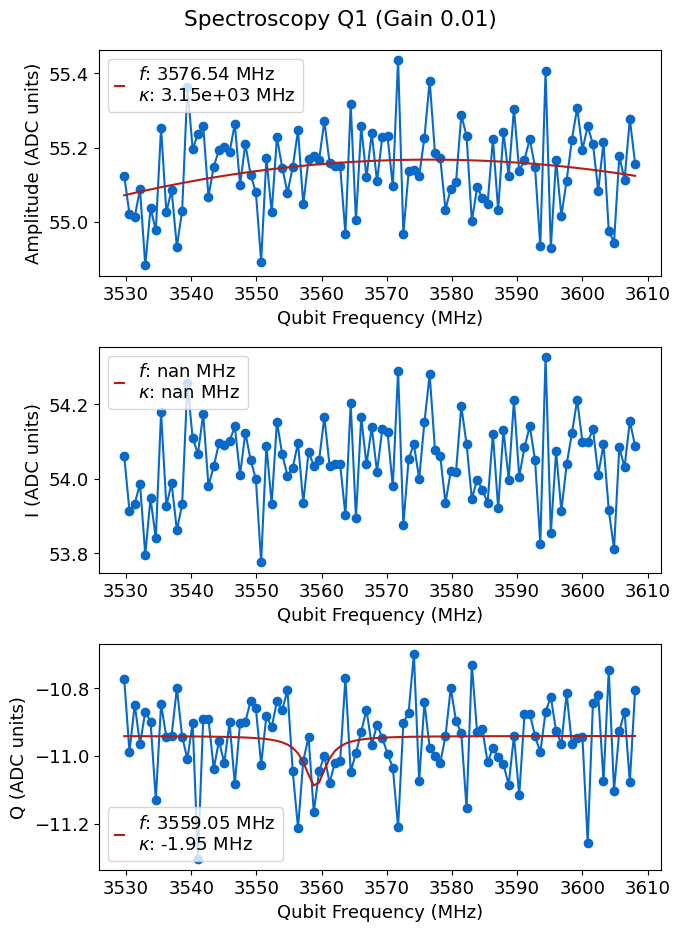

Bad qubit!


In [18]:
qubit_list = [1]
update=False
#qubit_list = np.arange(5)
for qi in qubit_list: 
    #qspec=meas.QubitSpec(cfg_dict, qi=qi, style='coarse', params={'gain':0.125,'reps':1500})
    qspec=meas.QubitSpec(cfg_dict, qi=qi, style='medium', params={'span':80,'expts':100,'gain':0.01,'reps':30000, 'length':1.5})
    #qspec=meas.QubitSpec(cfg_dict, qi=qi, style='coarse', params={'start':3100,'span':200,'expts':1000,'gain':1,'reps':800})
    if update and qspec.status: 
        auto_cfg = config.update_qubit(cfg_path, 'f_ge', qspec.data["best_fit"][2], qi)
        auto_cfg = config.update_qubit(cfg_path, 'kappa',2*qspec.data["best_fit"][3], qi)
    else:
        print('Bad qubit!')

In [ ]:
qi=0
qspec=meas.StarkSpec(cfg_dict, qi=qi, style='medium')


In [ ]:
cfg_dict

## Power sweep

### Wide scan looking for qubit

Qubit Number:   0%|          | 0/1 [00:00<?, ?it/s]

Start Frequency Sweep:   0%|          | 0/3 [00:00<?, ?it/s]

Unexpected parameters found in params: {'rng', 'expts_gain', 'max_gain', 'log'}
Unexpected parameters found in params: {'qubit', 'readout_length', 'soft_avgs', 'qubit_chan', 'length', 'gain', 'checkEF', 'pulse_type', 'start', 'final_delay', 'active_reset', 'sep_readout'}


  0%|          | 0/10 [00:00<?, ?it/s]

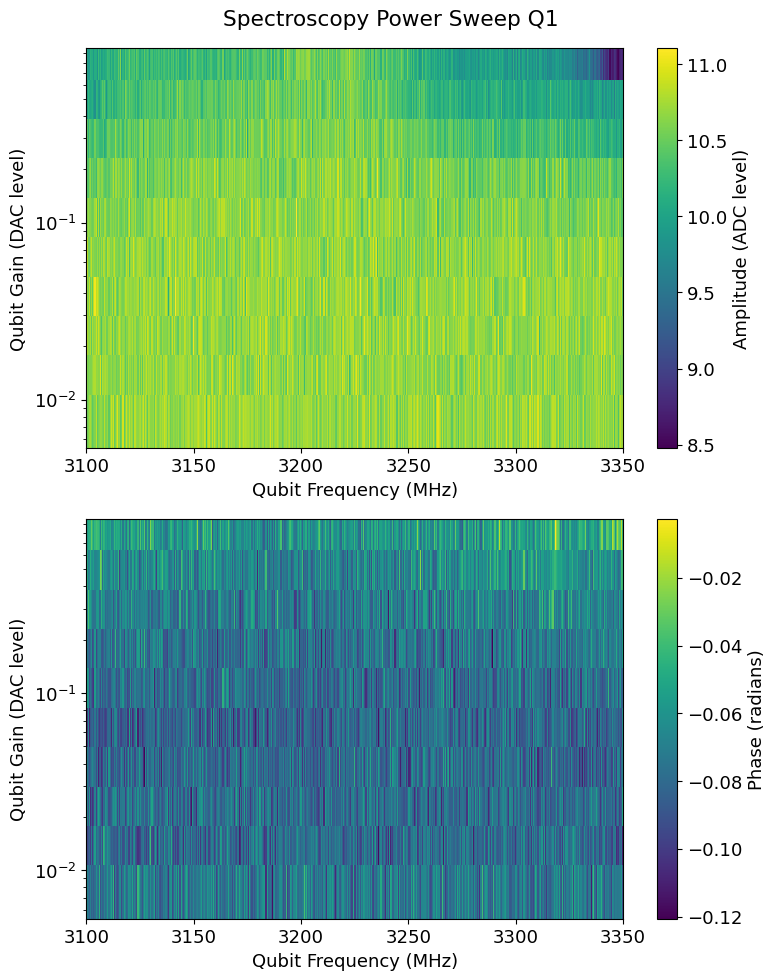

Unexpected parameters found in params: {'rng', 'expts_gain', 'max_gain', 'log'}
Unexpected parameters found in params: {'qubit', 'readout_length', 'soft_avgs', 'qubit_chan', 'length', 'gain', 'checkEF', 'pulse_type', 'start', 'final_delay', 'active_reset', 'sep_readout'}


  0%|          | 0/10 [00:00<?, ?it/s]

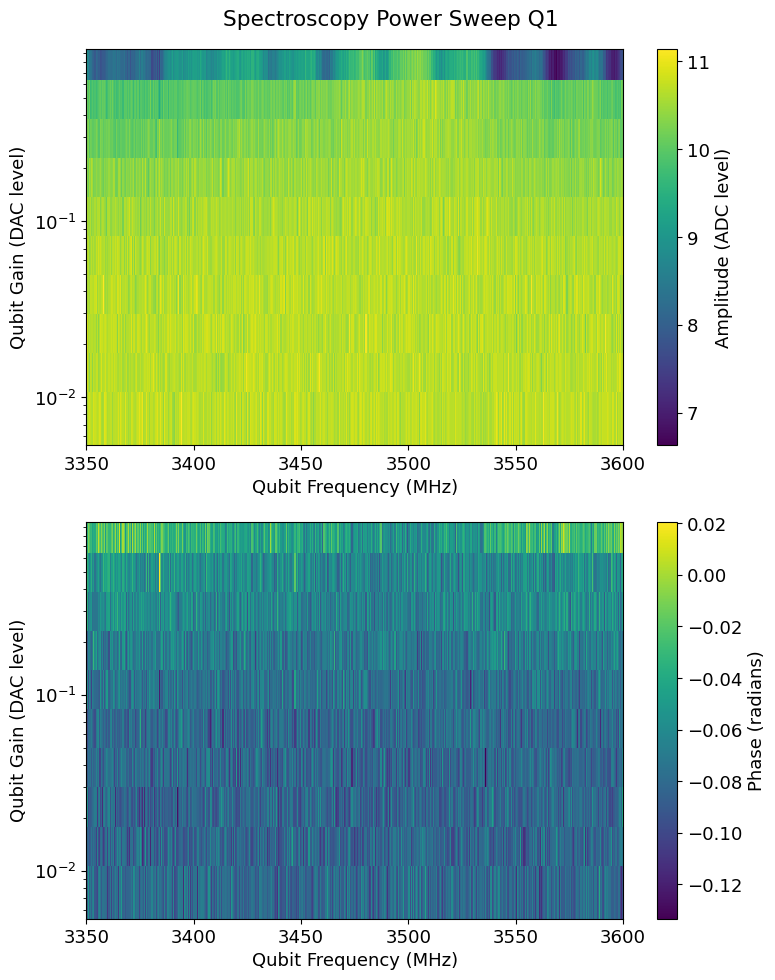

Unexpected parameters found in params: {'rng', 'expts_gain', 'max_gain', 'log'}
Unexpected parameters found in params: {'qubit', 'readout_length', 'soft_avgs', 'qubit_chan', 'length', 'gain', 'checkEF', 'pulse_type', 'start', 'final_delay', 'active_reset', 'sep_readout'}


  0%|          | 0/10 [00:00<?, ?it/s]

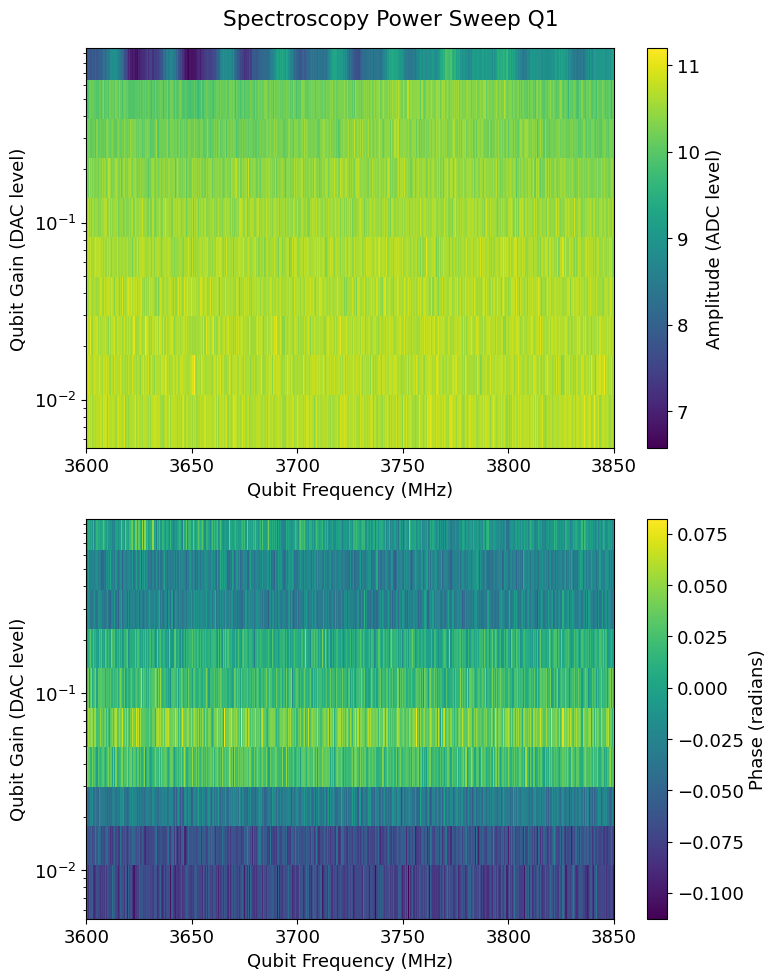

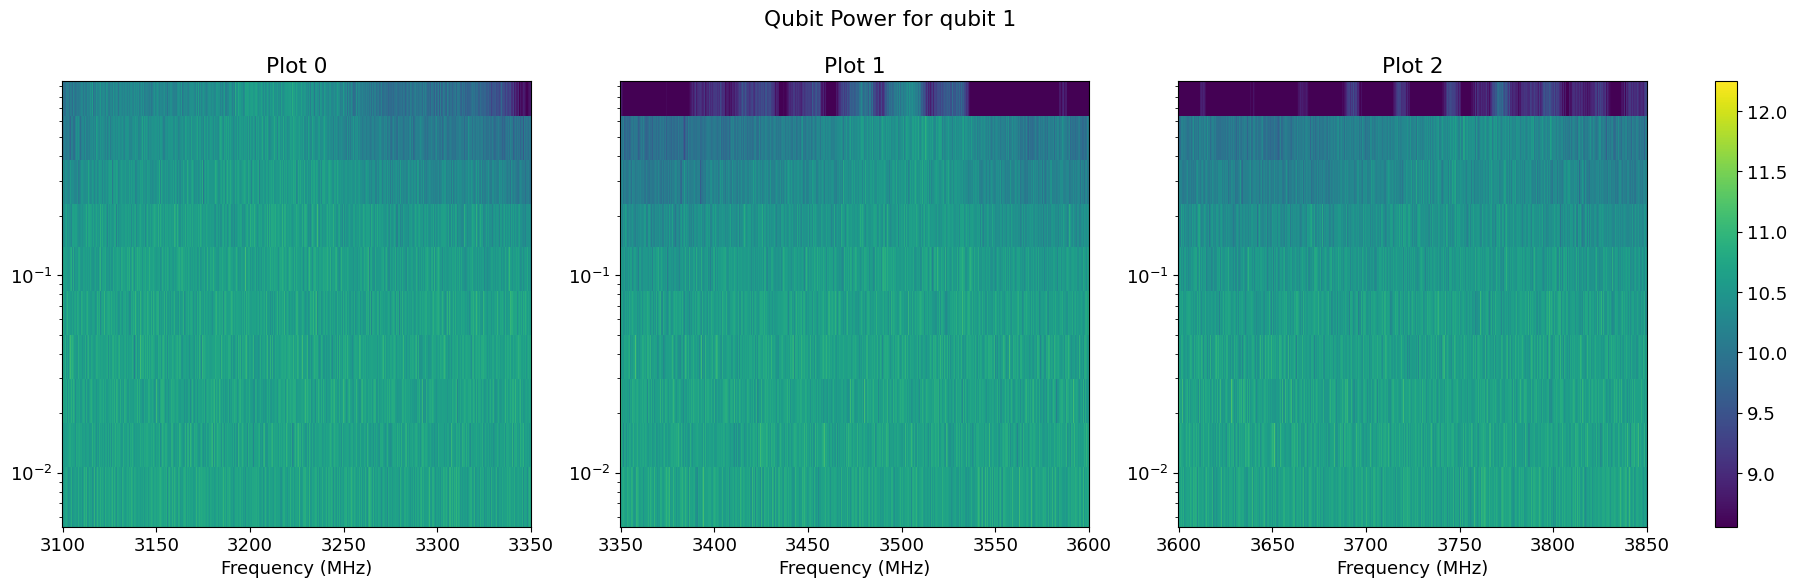

In [20]:
qubit_list = np.arange(20)
qubit_list=[1,]
span = 250
start_all = [2000, 3100, 3400]
end_all = [4780, 3700, 4250]
sensitivities = [0.8, 0.4, 0.2]

d = []
for qi in tqdm(qubit_list, desc='Qubit Number'):
    starts = np.arange(start_all[qi], end_all[qi], span)
    qresults = []
    for start in tqdm(starts, desc=f'Start Frequency Sweep'):
        q_res = meas.QubitSpecPower(
            cfg_dict, 
            qi=qi, 
            style='coarse', 
            params={
                'max_gain':0.8,
                'start':start,
                'span':span,
                'rng':100,
                'reps':800}
        )#,'start':3000,'span':300'})
        qresults.append(q_res)
    
    # Handy plot
    handy.plot_many_limited(
        qresults, 
        title=f'Qubit Power for qubit {qi}', 
        save_path=cfg_dict['expt_path'],
        yax='log', 
        chan='amps', 
        individial_fig_size= (6,6), 
        xlabel='Frequency (MHz)',
        sensitivity =  sensitivities[qi],
        save = False,
    )
    d.append(q_res)
    plt.show()

In [ ]:
handy.plot_many_limited(
        [d[-1]], 
        title=f'Qubit Power for qubit {qi}', 
        save_path=cfg_dict['expt_path'],
        yax='log', 
        chan='amps', 
        individial_fig_size= (6,6), 
        xlabel='Frequency (MHz)',
        sensitivity =  0.04,
        save = False
    )

In [ ]:
qi = 2
qresults = d[qi]
handy.plot_many_limited(
    qresults, 
    title=f'Qubit Power for qubit {qi}', 
    save = False, 
    save_path=cfg_dict['expt_path'], 
    yax='log', chan='amps', 
    individial_fig_size= (6,6), 
    xlabel='Frequency (MHz)', 
    sensitivity=0.07
)

In [ ]:
for qi in qubit_list:  
    qresults = d[qi]
    # Handy plot
    handy.plot_many_limited(qresults, title=f'high contrast Qubit Power for qubit {qi}', save_path=cfg_dict['expt_path'], yax='log', chan='amps', individial_fig_size= (6,6), xlabel='Frequency (MHz)', sensitivity=0.004)
# handy.plot_many_limited(qresults, title=f'Qubit Power for qubit {qi}', save_path=cfg_dict['expt_path'], yax='log', chan='amps', individial_fig_size= (6,6), xlabel='Frequency (MHz)', sensitivity=0.004)

In [ ]:

qubit_list=[2]
for qi in qubit_list:
    qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':3700,'span':600,'reps':1500,'expts':1200, 'max_gain':0.4, 'length':1,'sep_readout':False})

    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':2000,'span':2500,'reps':1500,'expts':2500, 'max_gain':0.4, 'length':1,'sep_readout':False})
    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':2000,'span':2500,'reps':1500,'expts':2500, 'max_gain':0.4, 'length':1})

In [ ]:
len_list = [2]
q=[]
qi=2

for l in len_list: 
    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':4000,'span':300,'reps':1500,'expts':500, 'max_gain':0.4, 'length':l,'sep_readout':True})
    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':4100,'span':100,'reps':4500,'expts':150, 'max_gain':0.4, 'length':l,'sep_readout':True})
    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':4100,'span':150,'reps':4500,'expts':150, 'max_gain':1, 'soft_avgs':10,'length':l,'sep_readout':True})
    qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'span':40,'reps':5000,'expts':100, 'max_gain':1, 'soft_avgs':10,'length':l,'rng':300})

    q.append(qspec_pow)

In [ ]:
qi=1
len_list = [2]
q=[]
for l in len_list: 
    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':4000,'span':300,'reps':1500,'expts':500, 'max_gain':0.4, 'length':l,'sep_readout':True})
    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':4100,'span':100,'reps':4500,'expts':150, 'max_gain':0.4, 'length':l,'sep_readout':True})
    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':4100,'span':150,'reps':4500,'expts':150, 'max_gain':1, 'soft_avgs':10,'length':l,'sep_readout':True})
    qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':3200,'span':400,'reps':550,'expts':1000, 'max_gain':1, 'soft_avgs':10,'length':l,'rng':300})

    q.append(qspec_pow)

In [ ]:
qi=1
len_list = [2]
qubit_list=[1,2]
q=[]
qi=2
for l in len_list: 
    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':4000,'span':300,'reps':1500,'expts':500, 'max_gain':0.4, 'length':l,'sep_readout':True})
    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':4100,'span':100,'reps':4500,'expts':150, 'max_gain':0.4, 'length':l,'sep_readout':True})
    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':4100,'span':150,'reps':4500,'expts':150, 'max_gain':1, 'soft_avgs':10,'length':l,'sep_readout':True})
    qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':3800,'span':400,'reps':1500,'expts':1000, 'max_gain':1, 'soft_avgs':10,'length':l,'rng':300})

    q.append(qspec_pow)

qi=1
for l in len_list: 
    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':4000,'span':300,'reps':1500,'expts':500, 'max_gain':0.4, 'length':l,'sep_readout':True})
    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':4100,'span':100,'reps':4500,'expts':150, 'max_gain':0.4, 'length':l,'sep_readout':True})
    #qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':4100,'span':150,'reps':4500,'expts':150, 'max_gain':1, 'soft_avgs':10,'length':l,'sep_readout':True})
    qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='', params={'start':3200,'span':400,'reps':1500,'expts':1000, 'max_gain':1, 'soft_avgs':10,'length':l,'rng':300})

    q.append(qspec_pow)   

In [ ]:
qspec_pow.print()

In [ ]:
handy.plot_many(q, title='Qubit Spec', chan='amps',yax='log',save_path=cfg_dict['expt_path'])

### Narrow scan

In [ ]:
qq=[]
# qubit_list = np.arange(20)
qubit_list=[0]
for qi in qubit_list:
    qspec_pow = meas.QubitSpecPower(cfg_dict, qi=qi, style='fine', params={'length':'t1','max_gain':1})
    # expts_gain=13, rng=300, soft_avgs=2, len='t1', span=60)
    qq.append(qspec_pow)
#handy.plot_many(qq, title='Qubit Power Amps 0.6-0.2', save_path=cfg_dict['expt_path'], yax='log', chan='amps')
#handy.plot_many(qq, title='Qubit Power Phase 0.6-0.2', save_path=cfg_dict['expt_path'], yax='log', chan='phases')

In [ ]:
qubit_list = np.arange(14,20)
qubit_list=[10]
#qubit_list = [0,1,2,10,11,12]
for qi in qubit_list: 
    auto_cfg = config.update_qubit(cfg_path, 'tuned_up',False, qi)

# Coherent scans

## Fast tuneup

Options are: 

first_time: assume we don't know t1 time,don't have single shot working

single: do single shot readout optimization 

readout: set readout frequency based on resonator fit

In [ ]:
qubit_list = np.arange(20)
qubit_list=np.delete(qubit_list, [5,13])
# Worst issue with this right now is when the qubit frequency is not correct and readout is bad; gets stuck doing ramsey/spectroscopy forever. In this case, cancel it and go back to find qubits, try changing readout gain. 
plt.rcParams.update({'font.size': 11})
qubit_list=[19]
for qi in qubit_list: 
    qubit_tuning.tune_up_qubit(qi, cfg_dict, first_time=False, single=True, readout = True)

In [ ]:
qubit_list=[13,5]
# Worst issue with this right now is when the qubit frequency is not correct and readout is bad; gets stuck doing ramsey/spectroscopy forever. In this case, cancel it and go back to find qubits, try changing readout gain. 
plt.rcParams.update({'font.size': 11})
for qi in qubit_list: 
    qubit_tuning.tune_up_qubit(qi, cfg_dict, first_time=False, single=True, readout = True)

## Set number of reps

In [ ]:
max_inc = 15 # dont' let it do more than 15x standard number of reps sot hat thtings don't take forever
auto_cfg = config.load(cfg_path)
#qubit_list = [11,16,18]
qubit_list = np.arange(20)
bad_qubits = [5,13]
qubit_list = np.delete(qubit_list, bad_qubits)
#qubit_list = np.arange(20)
qubit_list=[19]
for qi in qubit_list:
    config.update_readout(cfg_path, 'reps', 1/auto_cfg['device']['readout']['fidelity'][qi]**1.4, qi, rng_vals=[1,max_inc]);

## Time tracking

In [ ]:
cfg_dict['expt_path']=expt_path
qubit_list = np.arange(20)
bad_qubits = [0,5,13]
qubit_list = np.delete(qubit_list, bad_qubits)

tt=qubit_tuning.time_tracking(qubit_list, cfg_dict,display=False,total_time=48)
cfg_dict['expt_path']=expt_path

## Check how gain * sigma varies across qubits

In [ ]:
auto_cfg = config.load(cfg_path)
plt.figure()
gain_proxy = np.array(auto_cfg.device.qubit.pulses.pi_ge.gain)*np.array(auto_cfg.device.qubit.pulses.pi_ge.sigma)
gain_proxy1 = gain_proxy[0:10]
gain_proxy2 = gain_proxy[10:]
gain_proxy[gain_proxy>0.1]=np.nan
#plt.plot(np.array(auto_cfg.device.qubit.f_ge)[inds], gain_proxy[inds], 'o')

plt.plot(np.array(auto_cfg.device.qubit.f_ge)[0:10], gain_proxy1, 'o')
plt.plot(np.array(auto_cfg.device.qubit.f_ge)[10:], gain_proxy2, 'o')

## Rabi

### Amplitude

In [ ]:
qubit_list = np.arange(13,20)
qubit_list=[1]
pulse_len = 1

update=True

for qi in qubit_list: 
    #config.update_qubit(cfg_path,('pulses','pi_ge','sigma'), pulse_len,qi)
    amp_rabi = meas.RabiExperiment(cfg_dict,qi=qi)
    #amp_rabi = meas.RabiExperiment(cfg_dict,qi=qi, params = {'gain':0.1, 'reps':50000})
#    amp_rabi = meas.RabiExperiment(cfg_dict,qi=qi, params={'active_reset':True, 'gain':0.25,'freq':4370, 'reps':1000,'soft_avgs':3,'pulse_type':'const','sigma':1})

    if update and amp_rabi.status:
        config.update_qubit(cfg_path, ('pulses','pi_ge','gain'), amp_rabi.data['pi_length'], qi)
        

#### Chevron

In [ ]:
d2=[]
qubit_list = np.arange(18)
# Fix ; doing length rabi by default, plotting error 
qubit_list=[1]
for qi in qubit_list: 
    amp_rabi_chevron = meas.RabiChevronExperiment(cfg_dict,qi=qi, params={'span_f':10})
    d2.append(amp_rabi)
#handy.plot_many(d2, title='Rabi Chevron Phase', save_path=cfg_dict['expt_path'], chan='phases')

#### 2 Qubit Rabi

In [ ]:
qi=[0,10]
amp_rabi = meas.Rabi_2Q(cfg_dict,qi=qi, params={'active_reset':False})

### Length -- Not working!!

In [ ]:
qubit_list = [1]
update=False
# This does not work with gaussian pulses due to multiplying qickparams issues -- need to fix
for qi in qubit_list: 
    len_rabi = meas.RabiExperiment(cfg_dict,qi=qi, params={'sweep':'length', 'type':'const', 'sigma':0.1, 'gain':0.15,})
    if update and len_rabi.status:
       config.update_qubit(cfg_path, ('pulses','pi_ge','sigma'), len_rabi.data['pi_length'], qi) 
    

#### Chevron

In [ ]:
qubit_list = np.arange(20)
qubit_list=[2]
for qi in qubit_list: 
    len_rabi = meas.RabiChevronExperiment(cfg_dict,qi=qi, params={'sweep':'length',"type":"const", 'sigma':0.605, 'span_f':20})
    #len_rabi = meas.RabiChevronExperiment(cfg_dict,qi=qi, params={'sweep':'length',"type":"const", 'sigma':0.205, 'expts_f':60, 'span_f':150, 'gain':0.4,'start_f':6280,'soft_avgs':4})

In [ ]:
qi=19
gain = [1]
for g in gain:
    rd = meas.ReadoutCheck(cfg_dict,qi=qi, params={'gain':g, 'soft_avgs':20,'expts':20})

In [ ]:
plt.figure()
for hist, bin_centers in zip(rd.data['hist'], rd.data['bin_centers']):
    plt.plot(bin_centers,hist)

## Ramsey

In [ ]:
step = soc.cycles2us(1)
span = 40
expts = min(int(span/step),100)
qubit_list=[1]
update = True
for qi in qubit_list:
    t2r = meas.T2Experiment(cfg_dict, qi=qi, max_err=10)
    # t2r = meas.T2Experiment(cfg_dict, qi=qi, max_err=10, params = {'ramsey_freq':1.0,'expts':expts, 'span':0.5,'start':0.01})
    if t2r.status and update:
        config.update_qubit(cfg_path, 'f_ge', t2r.data['new_freq'], qi)
        auto_cfg = config.update_qubit(cfg_path, 'T2r', t2r.data['best_fit'][3], qi, rng_vals=[1.5, max_t1], sig=2)
    else:
        print('T2 Ramsey fit failed')

In [ ]:
t2r.analyze()

In [ ]:
t2r.display(debug=True)

In [ ]:
t2r = meas.T2Experiment(cfg_dict, qi=qi, max_err=10, style='fast')

In [ ]:
t2r.data['fit_err_par']

### Use Ramsey to recenter

In [ ]:
qubit_list = [2]
for qi in qubit_list:
    status = qubit_tuning.recenter(qi,cfg_dict)            

### Ramsey coherence

In [ ]:
t1= qubit_tuning.get_coherence(meas.RamseyExperiment, qi, cfg_dict,par='T2r')

## T1

In [ ]:
qubit_list = np.arange(11,20)
qubit_list=[1]
# If it's the first time, also set T2r and T2e as guesses 
update=True
first_time=False
for qi in qubit_list:
    t1 = meas.T1Experiment(cfg_dict, qi=qi, params={'reps':100000})
    if update: t1.update(cfg_path, first_time=first_time)

### T1 coherence

In [ ]:
qi=0
qubit_tuning.get_coherence(meas.T1Experiment,qi=qi,cfg_dict=cfg_dict,par='T1')

In [ ]:
qi=10
qubit_tuning.get_coherence(meas.T1Experiment,qi=qi,cfg_dict=cfg_dict,par='T1')

## Continuous scan at single point

In [ ]:
qi=0
#cProfile.run('meas.T1ContExperiment(cfg_dict,qi=qi, params={"shots":1000})')
meas.T1ContExperiment(cfg_dict,qi=qi, params={'shots':40000})

In [ ]:
import cProfile

qi=10
#cProfile.run('meas.T1ContExperiment(cfg_dict,qi=qi, params={"shots":1000})')
meas.T1ContExperiment(cfg_dict,qi=qi, params={'shots':100000, 'active_reset':False})

In [ ]:
meas.T1Experiment(cfg_dict, qi = 0)

In [ ]:
meas.T1Experiment(cfg_dict, qi = 10)

## T1 continuous 2Q

In [ ]:
qi = [10,0]
meas.T1_2Q(cfg_dict,qi=qi, )

In [ ]:
### T1 coherence

# from experiments.two_qubit.t1_2q import T1_2Q_Continuous
qi = [0,10]
meas.T1_2Q(cfg_dict,qi=qi, )
# meas.T1ContExperiment(cfg_dict,qi=qi, params={'shots':100000})

In [ ]:
import experiments as meas

In [ ]:
qi=[0,10]
scan_time = 0.1 #hours
number_of_scans = 1
shots = int(100000*scan_time*60/4)
print(shots)
for i in range(number_of_scans):
    meas.T1Cont2QExperiment(cfg_dict,qi=qi, params={'shots':shots, 'active_reset':False})
    # for q in qi:
    #     shot=meas.HistogramExperiment(cfg_dict, qi=q, params={'shots':20000})
    #     config.update_readout(cfg_path, 'phase', shot.data['angle'], q);
    #     config.update_readout(cfg_path, 'threshold',shot.data['thresholds'][0], q);
    #     config.update_readout(cfg_path, 'fidelity', shot.data['fids'][0], q);
    #     config.update_readout(cfg_path, 'sigma', shot.data['sigma'], q);
    #     config.update_readout(cfg_path, 'tm', shot.data['tm'],q);

In [ ]:
3*np.pi/4

## Echo

In [ ]:
qubit_list = np.arange(20)
qubit_list=[1]
update=True
for qi in qubit_list:
    #status, t2e = tuneup.get_coherence(cfg.make_t2e, i, cfg_dict,'T2e', min_r2=min_r2,tol=tol, max_t1=max_t1)
    t2e = meas.T2Experiment(cfg_dict, qi=qi, params={'experiment_type':'echo'})
    if t2e.status and update:
        auto_cfg = config.update_qubit(cfg_path, 'T2e', t2e.data['best_fit'][3], qi,sig=2, rng_vals=[1.5, max_t1*2])

In [ ]:
t2e.analyze()
t2e.display(debug=True)

### Get echo coherence

In [ ]:
qi=6
t2e = qubit_tuning.get_coherence(meas.RamseyEchoExperiment, qi, cfg_dict,'T2e')

## Feedback checks

In [ ]:
qi=10
reset = meas.MemoryExperiment(cfg_dict, qi=qi, params={'shots':1, 'expts':200})

In [ ]:
# Don't do the active reset, just do the repeated measurement 
#shot=meas.RepMeasExperiment(cfg_dict, qi=qi, params={'shots':20000})
qi=1
shot = meas.RepMeasExperiment(cfg_dict, qi=qi, params={'shots':30000,'active_reset':True, 'setup_reset':True})
shot.check_reset()


# Single Shot

In [ ]:
# Single shot 
qubit_list = np.arange(13,20)
qubit_list =[2]
for qi in qubit_list:
    shot=meas.HistogramExperiment(cfg_dict, qi=qi, params={'shots':300000})
    shot.update(cfg_path)
    

## Readout opt

### General sweep

In [ ]:
qubit_list=np.arange(14,20)

qubit_list=[0]

update=True
params = {'expts_f':1, 'expts_gain':7, 'expts_len':5}
#params = {'expts_f':10, 'expts_gain':1, 'expts_len':1}
#params = {'expts_f':1, 'expts_gain':9, 'expts_len':9,'start_gain':0.45, 'span_gain':0.05,'start_len':2, 'span_len':5}
for qi in qubit_list: 
    shotopt=meas.SingleShotOptExperiment(cfg_dict, qi=qi,params=params)#, style='fine')
    shotopt.analyze(low_gain=False)
    if update: shotopt.update(cfg_dict['cfg_file'])

In [ ]:
cfg_dict['cfg_file']

### Run optimization until it converges

In [ ]:
qubit_list=np.arange(20)
#qubit_list=[10]
qubit_list=[19]
params = {'expts_f':1, 'expts_gain':7, 'expts_len':7}
qubit_tuning.meas_opt(cfg_dict, qubit_list, params, do_res=True)

In [ ]:
# Single shot 
qubit_list = np.arange(13,20)
qubit_list =[11]
trig_list = np.linspace(0.2,1,12)
fids =[]
for qi in qubit_list:
    for trig in trig_list: 
        config.update_readout(cfg_path, 'trig_offset', trig, qi);
        shot=meas.HistogramExperiment(cfg_dict, qi=qi, params={'shots':20000, 'trigger':trig})
        fids.append(shot.data['fids'][0])
    

### Play with LO freq

In [ ]:
auto_cfg = config.load(cfg_path)
start_freq = auto_cfg.device.readout.frequency[qi]
start_mixer = auto_cfg.hw.soc.lo.mixer_freq[qi]
rng = np.linspace(-1000,1000,11)
for qi in qubit_list: 
    for r in rng: 
        config.update_lo(cfg_path, 'mixer_freq', start_mixer+r, qi)
        config.update_readout(cfg_path, 'frequency', start_freq-r, qi)
        shot=meas.HistogramExperiment(cfg_dict, qi=qi, params={'shots':20000})

config.update_lo(cfg_path, 'mixer_freq', start_mixer, qi)
config.update_readout(cfg_path, 'frequency', start_freq, qi)

#### Play with LO power

In [ ]:
qi = 11
gain_vals = [0.0375,0.05] 
for gain in gain_vals:
    config.update_lo(cfg_path, 'gain', gain, qi)
    shotopt=meas.SingleShotOptExperiment(cfg_dict, qi=qi,params={'npts_f':5, 'npts_gain':5, 'npts_len':5})

### Adjust reps for fidelity 

In [ ]:
max_inc = 15 # dont' let it do more than 15x standard number of reps sot hat thtings don't take forever
auto_cfg = config.load(cfg_path)
qubit_list = [10]
for qi in qubit_list:
    config.update_readout(cfg_path, 'reps', 1/auto_cfg['device']['readout']['fidelity'][qi]**1.5, qi, rng_vals=[1,max_inc]);

## Active reset

### Check active reset at standard threshold

In [ ]:
# Setup reset uses the calibrated angle and runs active reset process at end, but also uses usual final_delay so that it's ok if reset not working
qubit_list = np.arange(15,20)
qubit_list=[3]
d=[]
for qi in qubit_list:
    shot = meas.HistogramExperiment(cfg_dict, qi=qi, params={'shots':100000,'active_reset':True, 'setup_reset':True})
    shot.check_reset()
    #config.update_readout(cfg_path, 'reset_e', shot.data['reset_e'], qi)
    #config.update_readout(cfg_path, 'reset_g', shot.data['reset_g'], qi)
    d.append(shot)

### Sweep threshold

In [ ]:
d = []
qi=10
auto_cfg = config.load(cfg_path)
threshold = auto_cfg['device']['readout']['threshold'][qi]
thresh = np.linspace(threshold-25,threshold+25,16)
#thresh = np.linspace(threshold-10,threshold+10,6)
for t in thresh:
    shot=meas.HistogramExperiment(cfg_dict, qi=qi, params={'shots':100000,'threshold_v':t, 'active_reset':True,'setup_reset':True}, display=False, progress=False)
    d.append(shot)
    #shot.check_reset()
tuneup.plot_reset(d)

In [ ]:
tuneup.plot_reset(d)

In [ ]:
# Check how many qubits meet certain thresholds for success of reset. 
reset_e = [d[i].data['reset_e'] for i in range(len(d))]
reset_g = [d[i].data['reset_g'] for i in range(len(d))]

plt.figure()
plt.semilogy(reset_e,'o')
plt.axhline(y=0.15, color='r', linestyle='--')
plt.semilogy(reset_g,'ro')
plt.semilogy(np.array(reset_g)/np.array(reset_e), 'ko')
plt.axhline(y=1, color='r', linestyle='--')
#plt.show()

### Turn off active reset for all config chans

In [ ]:
for qi in range(20):
    config.update_readout(cfg_path, 'active_reset',False, qi)

In [ ]:
config.update_readout(cfg_path, 'active_reset',True, 17);

### Turn on active reset for channels where it seems to be working

In [ ]:
e_success = 0.15 # Ratio of e proportion after active reset compared to before
g_vs_e = 2 # Ratio of g proportion to e proportion after active reset

auto_cfg = config.load(cfg_path)
reset_e = auto_cfg['device']['readout']['reset_e']
reset_g = auto_cfg['device']['readout']['reset_g']
result = np.array(reset_e)< e_success | np.array(reset_g)/np.array(reset_e)<g_vs_e
for qi in range(20):
    config.update_readout(cfg_path, 'active_reset',bool(result[qi]), qi)

### Check reset (plotting result of reset)

In [ ]:
qubit_list = np.arange(11,20)
qubit_list =[17]
for qi in qubit_list:
    shot = meas.HistogramExperiment(cfg_dict, qi=qi, params={'shots':50000,'active_reset':True})
    shot.check_reset()

# Chi

In [ ]:
# Need a tuned up pi pulse for this
#for i in range(num_qubits):
qubit_list = [0]
for qi in qubit_list: 
    chi, chi_val=tuneup.check_chi(cfg_dict, qi)
    auto_cfg = config.update_readout(cfg_path, 'chi', chi_val, qi)


# 2 Qubit

In [ ]:
t12q = meas.T1_2Q(cfg_dict, qi=[10,0], params={'active_reset':False, })

In [ ]:
rabi2q = meas.Rabi_2Q(cfg_dict, qi=[10,0], params={'active_reset':True})

# EF 

In [ ]:
## Compare expected EF to actual
auto_cfg = config.load(cfg_path)

alpha=np.array(auto_cfg.device.qubit.f_ef)-np.array(auto_cfg.device.qubit.f_ge)
corr = np.array([188,210,168,186,155,171,187,145,157,169,188,210,168,186,155,171,187,145,157,169])

alpha+corr

#f_ef=np.array(auto_cfg.device.qubit.f_ge)-corr
#f_ef
#6,7,8, 11 16 18

### Initial setting of frequencies based on guess for alpha

In [ ]:
# Initial set of the frequencyies based on guess for alpha 
alpha = -180
qubit_list = np.arange(20)
auto_cfg = config.load(cfg_path)
for i in qubit_list: 
    f_ge = auto_cfg['device']['qubit']['f_ge'][i]
    auto_cfg = config.update_qubit(cfg_path, 'f_ef', f_ge+alpha, i)

## Spectroscopy EF

### General search

In [ ]:
qubit_list= np.arange(1,20)
bad_qubits=[]
qubit_list=[0]
for qi in qubit_list:
    status, ntries = qubit_tuning.find_spec(qi, cfg_dict, start='medium', freq='ef')
    if not status:
        bad_qubits.append(qi)

### Specific width

In [ ]:
# You may want to update this frequency, which will be the center of the scan. 
#style huge, coarse, medium, fine 
update=True
qubit_list = np.arange(10)
qubit_list=[2]
for qi in qubit_list:
    qspec=meas.QubitSpec(cfg_dict, qi=qi, style='coarse', params={'checkEF':True, 'gain':1,'reps':2000})#, params={'span':500, 'expts':1000,'reps':500,'gain':0.2})

    #qspec=meas.QubitSpec(cfg_dict, qi=qi, style='medium', params={'checkEF':True})#, params={'span':500, 'expts':1000,'reps':500,'gain':0.2})
    if update and qspec.status:
        auto_cfg = config.update_qubit(cfg_path, 'f_ef', qspec.data["best_fit"][2], qi)

## Rabi EF

In [ ]:
# If first time, initialize the sigma and gain to those of the ge 
first_time =False
update=True

qubit_list = np.arange(1,20)
qubit_list=[0]

bad_qubits = []
auto_cfg = config.load(cfg_path)

for qi in qubit_list: 
    if first_time:
        #config.update_qubit(cfg_path, 'f_ef', auto_cfg.device.qubit.f_spec_ef[qi], qi)
        auto_cfg = config.update_qubit(cfg_path, ('pulses','pi_ef','sigma'), auto_cfg['device']['qubit']['pulses']['pi_ge']['sigma'][qi], qi)
        auto_cfg = config.update_qubit(cfg_path, ('pulses','pi_ef','gain'), auto_cfg['device']['qubit']['pulses']['pi_ge']['gain'][qi], qi)
    amp_rabi = meas.RabiExperiment(cfg_dict,qi=qi, params={'checkEF':True})
    if update and amp_rabi.status:
        config.update_qubit(cfg_path, ('pulses','pi_ef','gain'), amp_rabi.data['pi_length'], qi)
    else:
        print(f'Amplitude Rabi fit failed for qubit {qi}')
        bad_qubits.append(qi)

## Qubit Temperature

In [ ]:
qubit_list = np.arange(1)
qubit_list=[12]
for qi in qubit_list: 
    temp, pop = tuneup.measure_temp(cfg_dict, qi=qi, soft_avgs=5)
    auto_cfg = config.update_qubit(cfg_path, 'temp', temp, qi)
    auto_cfg = config.update_qubit(cfg_path, 'pop', pop, qi)

In [ ]:
0.01/6

## Ramsey EF

In [ ]:
qubit_list=np.arange(1,20)
qubit_list=[12]
for qi in qubit_list:
    t2r = meas.RamseyExperiment(cfg_dict, qi=qi, params={'ramsey_freq':0.1, 'checkEF':True})

    if t2r.status:
        config.update_qubit(cfg_path, 'f_ef', t2r.data['new_freq'], qi)
        #auto_cfg = config.update_qubit(cfg_path, 'T2r', t2r.data['best_fit'][3], qi, rng_vals=[1.5, max_t1], sig=2)
    else:
        print('T2 Ramsey fit failed')

# Stark

## Ramsey

### Single experiment

In [ ]:
qi=10
meas.RamseyStarkExperiment(cfg_dict, qi=qi, params={'stark_gain':0.0,'step':0.1,'df':200,'acStark':False,'ramsey_freq':0.1})

In [ ]:
qi=10
meas.RamseyStarkExperiment(cfg_dict, qi=qi, params={'stark_gain':0.0,'step':0.1,'df':200,'acStark':False,'ramsey_freq':0.1})

### Sweep frequency

In [ ]:
qubit_list = np.arange(3,20)
qubit_list=[3]
gain = np.linspace(0.1,1,10)
for qi in qubit_list:
    for g in gain:
        t2rstark=meas.RamseyStarkFreqExperiment(cfg_dict, qi=qi, params={'step':1/430+0.001, 'stark_gain':g, 'start_df':30, 'end_df':150, 'expts_df':10})

In [ ]:
qubit_list = np.arange(3,20)
qubit_list=[17]
for qi in qubit_list:
    t2rstark=meas.RamseyStarkFreqExperiment(cfg_dict, qi=qi, params={'step':1/430+0.001, 'stark_gain':0.1, 'start_df':20, 'end_df':100, 'expts_df':40})

In [ ]:
1/430*100

### Calibrate stark power positive freq

In [ ]:
qubit_list = np.arange(13,20)
qubit_list=[19]
d=[]
freqs= [200]
for f in freqs:
    for qi in qubit_list:
        t2rstark=meas.RamseyStarkPowerExperiment(cfg_dict, qi=qi, params={'step':1/430+0.001, 'expts_gain':12, 'df':f, 'start_gain':0.1, 'end_gain':1})
        d.append(t2rstark)
        config.update_stark(cfg_path, 'q', t2rstark.data['quad_fit'][0], qi)
        config.update_stark(cfg_path, 'l', t2rstark.data['quad_fit'][1], qi)
        config.update_stark(cfg_path, 'o', t2rstark.data['quad_fit'][2], qi)

In [ ]:
plt.figure()
for i in range(len(t2rstark.data['bin_centers'])):
    plt.plot(t2rstark.data['bin_centers'][i], t2rstark.data['hist'][i])
               

### Negative frequency

In [ ]:
#qubit_list = np.arange(20)
d=[]
qubit_list=[19]
for qi in qubit_list:
    t2rstark=meas.RamseyStarkPowerExperiment(cfg_dict, qi=qi, params={'step':1/430+0.001, 'expts_gain':12, 'df':-100, 'start_gain':0.08, 'end_gain':0.35, 'soft_avgs':2})
    d.append(t2rstark)
    config.update_stark(cfg_path, 'qneg', t2rstark.data['quad_fit'][0], qi)
    config.update_stark(cfg_path, 'lneg', t2rstark.data['quad_fit'][1], qi)
    config.update_stark(cfg_path, 'oneg', t2rstark.data['quad_fit'][2], qi)
#handy.plot_many(d, title='Ramsey Stark', save_path=cfg_dict['expt_path'])

## T1

### Single exp

In [ ]:
qi=19
gain_list = [0.5,0.6,0.77]
for g in gain_list:
    t1 = meas.T1StarkExperiment(cfg_dict, qi=qi, params={'active_reset':False, 'df':200, 'stark_gain':g,'expts':300,'span':10}) 

In [ ]:
plt.figure()

t1 = meas.T1StarkExperiment(cfg_dict, qi=qi, params={'active_reset':False, 'df':200, 'stark_gain':0.2,'end_wait':10}) 
t12 = meas.T1StarkExperiment(cfg_dict, qi=qi, params={'active_reset':False, 'df':200, 'stark_gain':0.7,'end_wait':10}) 
t1x = meas.T1StarkExperiment(cfg_dict, qi=qi, params={'active_reset':False, 'df':200, 'stark_gain':0.2,'end_wait':5}) 
t1y = meas.T1StarkExperiment(cfg_dict, qi=qi, params={'active_reset':False, 'df':200, 'stark_gain':0.7,'end_wait':5}) 
t13 = meas.T1StarkExperiment(cfg_dict, qi=qi, params={'active_reset':False, 'df':200, 'stark_gain':0.2,'end_wait':0.05}) 
t14 = meas.T1StarkExperiment(cfg_dict, qi=qi, params={'active_reset':False, 'df':200, 'stark_gain':0.7, 'end_wait':0.05}) 

plt.plot(t1.data['bin_centers'], t1.data['hist'], 'r')
plt.plot(t12.data['bin_centers'], t12.data['hist'],'r')

plt.plot(t1x.data['bin_centers'], t12.data['hist'],'g')
plt.plot(t1y.data['bin_centers'], t12.data['hist'],'g')

plt.plot(t13.data['bin_centers'], t13.data['hist'],'b')
plt.plot(t14.data['bin_centers'], t14.data['hist'],'b')

In [ ]:
plt.figure()

t1 = meas.T1StarkExperiment(cfg_dict, qi=qi, params={'active_reset':False, 'df':200, 'stark_gain':0.2}) 
t12 = meas.T1StarkExperiment(cfg_dict, qi=qi, params={'active_reset':False, 'df':200, 'stark_gain':0.7}) 
plt.plot(t1.data['bin_centers'], t1.data['hist'])
plt.plot(t12.data['bin_centers'], t12.data['hist'])

### Gain sweep

In [ ]:
qubit_list = np.arange(12,20)
qubit_list=[19]
flist=[210,180]
for f in flist:
    for qi in qubit_list: 
        #t1_neg = meas.T1StarkPowerExperiment(cfg_dict, qi=qi, params={'df':-70,'start_gain':0.02,'end_gain':0.2,'start':3, 'soft_avgs':4})

        t1_pos = meas.T1StarkPowerExperiment(cfg_dict, qi=qi, params={'df':f,'start_gain':0.3,'end_gain':1,'start':0.2, 'soft_avgs':1,'span':0.5,'expts_gain':80}) #, 'start':100,'span':0.34, 'expts':100, 'soft_avgs':3})
        plt.figure()
        for i in range(len(t1_pos.data['bin_centers'])):
            plt.plot(t1_pos.data['bin_centers'][i], t1_pos.data['hist'][i])

### Freq sweep

In [ ]:
t1_freq = meas.T1StarkFreqExperiment(cfg_dict, qi=19, params={'span':6, 'span_f':100, 'start_df':50, 'expts_f':100})

In [ ]:
t1_freq = meas.T1StarkFreqExperiment(cfg_dict, qi=19, params={'span':6, 'span_f':100, 'start_df':50, 'expts_f':100,'gain':0.5})

### Single evo point linear gain sweep

In [ ]:
t1_cont = meas.T1StarkPowerSingle(cfg_dict, qi=0, params={"soft_avgs":4})

### Run linear scan for multiple qubits

In [ ]:
#first, need to configure active reset and check stark for all. 
nexp = 3
qubit_list =[1,2]#2,4,5,6,7]
expts = 200
t1_data = [[] for _ in qubit_list]

for i in range(nexp):
    for j, qi in enumerate(qubit_list):
        t1_cont = meas.T1StarkPowerSingle(cfg_dict, qi=qi, params={ "soft_avgs":2,'expts':100})
        t1_data[j].append(t1_cont.data['t1'])

plt.figure()
fig, ax = plt.subplots(3, 2, figsize=(10, 10))
ax = ax.flatten()
for i, qi in enumerate(qubit_list):
    ax[i].set_title(f'Q{qi}')
    ax[i].pcolormesh(t1_data[i])
    plt.colorbar(ax[i].collections[0], ax=ax[i])

### Repeated single evo, sweep frequency linearly with gain [Main scan]

In [ ]:
d=[]
qi=6
params={'stop_f':20, 'df_pos':100, 'df_neg':-70}
for i in range(200):
    if i%10==0:
        t1stark=meas.T1StarkPowerQuadSingle(cfg_dict, qi=qi, params=params)
        shot = meas.HistogramExperiment(cfg_dict, qi=qi, params={'shots':20000})
        config.update_readout(cfg_path, 'threshold',shot.data['thresholds'][0], qi);
        config.update_readout(cfg_path, 'phase', shot.data['angle'], qi);
        phase.append(shot.data['angle'])
    else:
        t1stark=meas.T1StarkPowerQuadSingle(cfg_dict, qi=qi, params=params, display=False, progress=False)

    d.append(t1stark)

times = [d[i].data['start_time'] for i in range(0, len(d))] 
tm = [datetime.strptime(times[i].decode('utf-8'), '%Y-%m-%d %H:%M:%S') for i in range(len(times))]
time_from_first = [(t - tm[0]).total_seconds() for t in tm]
print(time_from_first)

concatenated_data = np.concatenate([d[i].data['avgi'] for i in range(0, len(d))], axis=1)

plt.figure()
plt.pcolormesh(concatenated_data)

In [ ]:
plt.figure()
concatenated_data = np.concatenate([d[i].data['avgi'] for i in range(0, len(d))], axis=1)
import matplotlib.dates as mdates

plt.pcolormesh(np.array(time_from_first)/60/60, d[-1].data['f_pts'], concatenated_data)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
#plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
#plt.gcf().autofmt_xdate()


### Multiple time evos (not currently using)

In [ ]:
t1stark=meas.T1StarkPowerQuadMulti(cfg_dict, qi=0, params={'stop_f':25, 'df_pos':100, 'df_neg':-90, 'active_reset':True})

### Calib sweep

### Analysis of multiple evo times using normal fittingh

In [ ]:
# Processing for multiple evo times 
cd0 = np.concatenate([d[i].data['avgi_0'] for i in range(0, len(d))], axis=1)
cd1 = np.concatenate([d[i].data['avgi_1'] for i in range(0, len(d))], axis=1)
cd2 = np.concatenate([d[i].data['avgi_2'] for i in range(0, len(d))], axis=1)
cd3 = np.concatenate([d[i].data['avgi_3'] for i in range(0, len(d))], axis=1)

combined_cd = np.stack((cd0, cd1, cd2, cd3), axis=-1)
print(combined_cd.shape)

tms=d[0].data['wait_times']

sns.set_palette('coolwarm',len(combined_cd))
from scipy.optimize import curve_fit
plt.figure()
def t1_fit(x, a, b, c):
    return b * np.exp(-x / c) + a
fits=[]
tm_full = np.linspace(0, tms[3])
#for i in range(5):
for i in range(len(combined_cd)):
    plt.plot(tms, combined_cd[i][0][:],'o-')
    p0 = (np.min(combined_cd[i][0][:]), np.max(combined_cd[i][0][:])-np.min(combined_cd[i][0][:]), tms[2])
    popt, err = curve_fit(t1_fit, tms, combined_cd[i][0][:], p0=p0)
    fit_err = np.sqrt(np.diag(err))   
    if np.mean(fit_err/np.abs(popt))>0.5:
        fits.append(np.nan*np.ones(3))   
    else:
        fits.append(popt)
    #print(p0)
    #plt.plot(tm_full, t1_fit(np.array(tm_full), *popt),'k', label=f'Fit {i}')
    #print(popt)
#plt.legend()
t1_data = [fits[i][2] for i in range(len(fits))]    
offset = [fits[i][0] for i in range(len(fits))]
amp = [fits[i][1] for i in range(len(fits))]

fig, ax = plt.subplots(3, 1, figsize=(8, 7))
ax[0].plot(t1_data, 'o-')
ax[1].plot(offset, 'o-')
ax[2].plot(amp, 'o-')

In [ ]:
# Concatenate all d[i].data['avgi'] into a single dataset
concatenated_data = np.concatenate([d[i].data['avgi'] for i in range(1, len(d))], axis=1)

#print(concatenated_data)

plt.figure()
plt.pcolormesh(concatenated_data)

#### Check max value for calibration

In [ ]:
np.max(t1.data['avgi'], axis=1)
plt.figure()
plt.plot(np.max(t1.data['avgi'], axis=1))